# Credit Card Recommender System.

### Importing all the basic library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing the Credit Card DataSet

In [2]:
df=pd.read_csv("BankChurners.csv")

In [3]:
#Display all the rows and columns upto 100 observation

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

### Data Insights & EDA

In [4]:
# Printing the shape of dataset

print(df.shape)
print('The shape of train data is: Row {} columns {}'.format(df.shape[0],df.shape[1]))

(10127, 23)
The shape of train data is: Row 10127 columns 23


In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
#dropping last two columns as mentioned in data section

df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis = 1, inplace = True)

In [7]:
#View summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Comments:
- This info reflects that there are no missing values. 

- Let us analyse the feature 'Attrition_Flag'

##### Attrition_Flag

In [8]:
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

- Since our aim is to build a recommender system we will keep the existing customers only as the Attributed customer's data will not be a goot choice for recommendation

In [9]:
df_Existing=df.loc[np.where(df['Attrition_Flag']=='Existing Customer')]

In [10]:
df_Existing.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


In [11]:
#View the statistical summary of numerical variables

df_Existing.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


###### Our target will be to recommend different types of card from 'card_category' to every user.

In [12]:
df_Existing['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [13]:
df_Existing['Card_Category'].value_counts()

Blue        7917
Silver       473
Gold          95
Platinum      15
Name: Card_Category, dtype: int64

- We will drop the unnecessary columns.

In [14]:
drop_columns=['CLIENTNUM','Attrition_Flag']

In [15]:
df_Existing.drop(columns=drop_columns,axis=1,inplace=True)

####  Separating the categorical and numerical features

In [16]:
#categorical features
categorical = df_Existing.select_dtypes(include =[np.object])
print("Categorical Features in DataSet:",categorical.shape[1])
print(categorical.columns)

#numerical features
numerical= df_Existing.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in DataSet:",numerical.shape[1])
print(numerical.columns)

Categorical Features in DataSet: 5
Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')
Numerical Features in DataSet: 14
Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


## Univariate Analysis

### - The numerical features

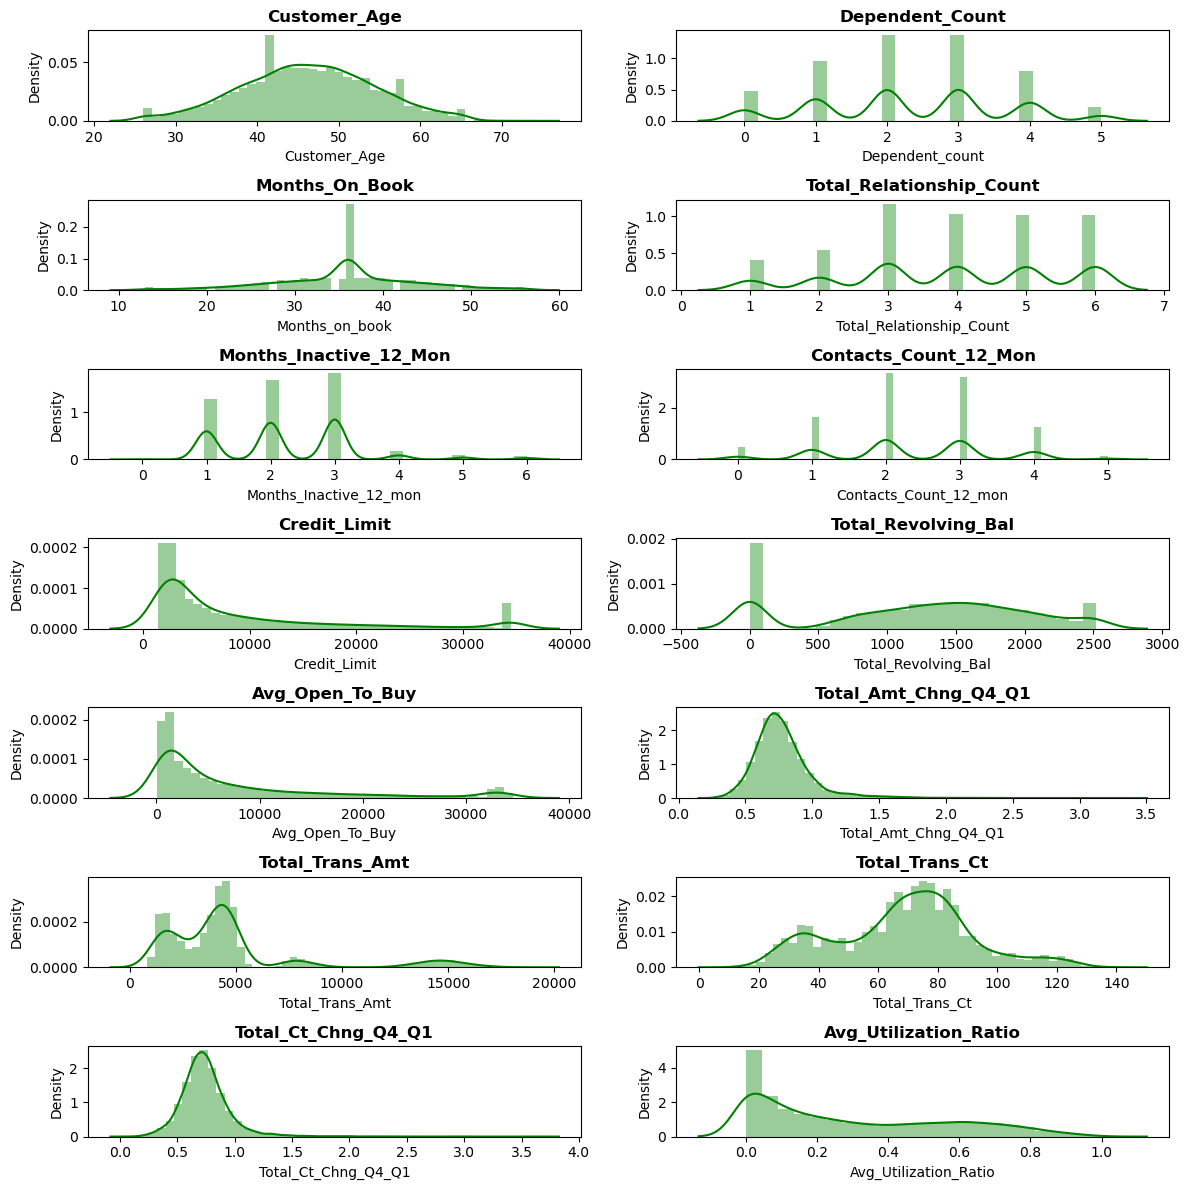

In [17]:
target = [i for i in numerical.columns]
plt.figure(figsize=(12,12))
for n,column in enumerate(target):
    plot=plt.subplot(7,2,n+1)
    sns.distplot(df_Existing[column],color='green')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()


### - The categorical features

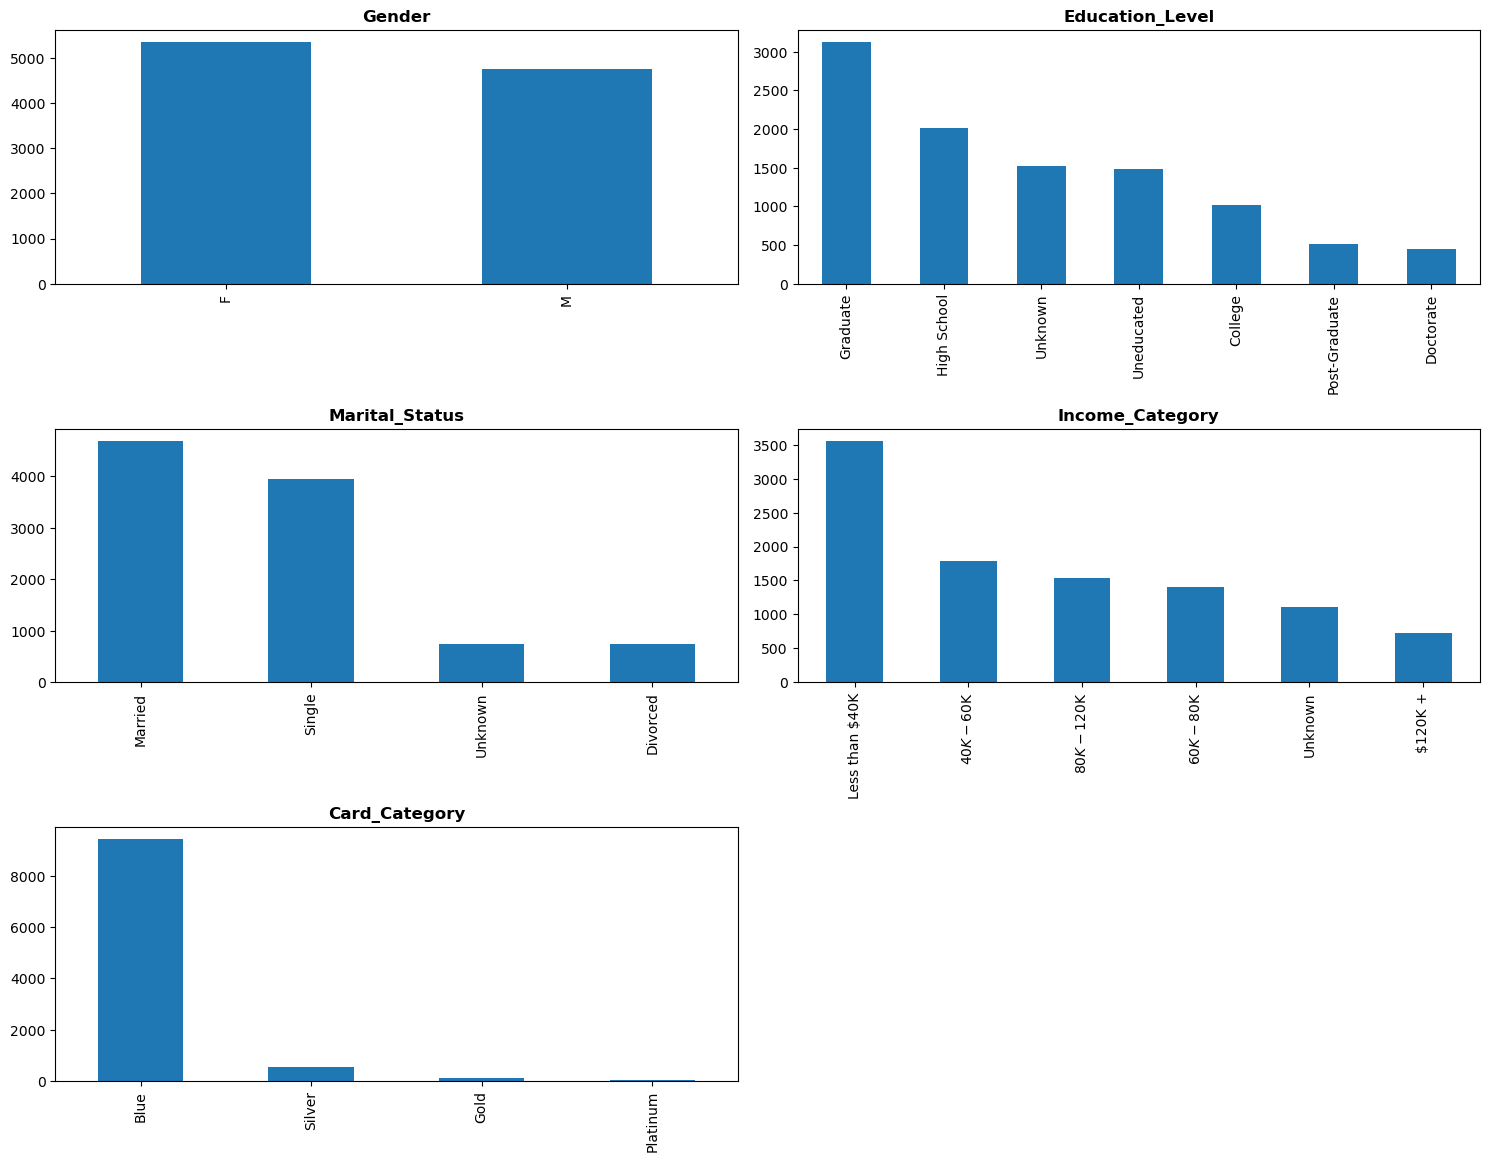

In [18]:
target = [i for i in categorical.columns]
plt.figure(figsize=(15,15))
for n,column in enumerate(target):
    plot=plt.subplot(4,2,n+1)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

### Handling Categorical Data

In [19]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [20]:
le = LabelEncoder()

df_Existing['Gender'] = le.fit_transform(df_Existing.Gender)
df_Existing['Education_Level'] = le.fit_transform(df_Existing.Education_Level)
df_Existing['Marital_Status'] = le.fit_transform(df_Existing.Marital_Status)
df_Existing['Income_Category'] = le.fit_transform(df_Existing.Income_Category)
df_Existing['Card_Category'] = le.fit_transform(df_Existing.Card_Category)

In [21]:
df_Existing.corr()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.020615,-0.116105,0.002327,-0.016521,-0.017639,-0.025429,0.792861,-0.001692,0.017672,-0.020154,-0.004046,0.028057,-0.006384,-0.080969,-0.037042,-0.060667,-0.007010,0.017854
Gender,-0.020615,1.000000,0.001302,-0.001299,-0.002106,-0.535766,0.073751,-0.008096,0.014140,-0.007359,0.050510,0.412812,0.023797,0.410705,0.015659,0.002039,-0.107546,-0.038418,-0.284555
Dependent_count,-0.116105,0.001302,1.000000,-0.001510,0.004897,-0.035299,0.021253,-0.096438,-0.040891,-0.012565,-0.050839,0.072247,-0.002237,0.072412,-0.028056,0.034773,0.067864,0.030797,-0.037534
Education_Level,0.002327,-0.001299,-0.001510,1.000000,0.012119,-0.005364,-0.003983,-0.003167,0.018145,-0.011395,0.006592,0.003299,0.011424,0.002345,0.002042,0.012281,0.000615,0.001587,0.008174
Marital_Status,-0.016521,-0.002106,0.004897,0.012119,1.000000,0.007884,0.036861,-0.018808,-0.015990,0.001038,-0.001404,0.032621,-0.024545,0.034658,-0.044751,0.048476,0.091016,-0.001967,-0.030883
Income_Category,-0.017639,-0.535766,-0.035299,-0.005364,0.007884,1.000000,-0.052715,-0.020620,0.005577,0.026479,-0.020780,-0.217697,-0.032093,-0.214957,-0.003372,-0.006072,0.051768,0.033287,0.129986
Card_Category,-0.025429,0.073751,0.021253,-0.003983,0.036861,-0.052715,1.000000,-0.017222,-0.084891,-0.016381,-0.002529,0.480308,0.018678,0.478608,-0.000253,0.175941,0.120126,-0.019392,-0.224570
Months_on_book,0.792861,-0.008096,-0.096438,-0.003167,-0.018808,-0.020620,-0.017222,1.000000,-0.003959,0.026037,-0.008644,0.002939,0.014847,0.001700,-0.064186,-0.030439,-0.044461,-0.008363,-0.000683
Total_Relationship_Count,-0.001692,0.014140,-0.040891,0.018145,-0.015990,0.005577,-0.084891,-0.003959,1.000000,0.030786,0.105083,-0.078832,-0.033010,-0.076056,0.037957,-0.431029,-0.370710,-0.002976,0.046135
Months_Inactive_12_mon,0.017672,-0.007359,-0.012565,-0.011395,0.001038,0.026479,-0.016381,0.026037,0.030786,1.000000,-0.004091,-0.020383,-0.005453,-0.019923,-0.015316,-0.010820,0.015925,0.007899,0.024996


###### There are many  features that are not corelated with card_category which will not be helpful for recommending card type, hence we can drop these features.

In [22]:
non_corelated_cols=['Customer_Age','Gender',"Marital_Status",'Dependent_count','Education_Level','Income_Category','Months_on_book','Total_Relationship_Count',
                   
                  'Avg_Open_To_Buy','Total_Revolving_Bal','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

In [23]:
df_Existing.drop(columns=non_corelated_cols,axis=1,inplace=True)

In [24]:
df_Existing.corr()

,Card_Category,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct
Card_Category,1.000000,0.480308,0.175941,0.120126
Credit_Limit,0.480308,1.000000,0.159970,0.057864
Total_Trans_Amt,0.175941,0.159970,1.000000,0.812527
Total_Trans_Ct,0.120126,0.057864,0.812527,1.000000


<AxesSubplot: >

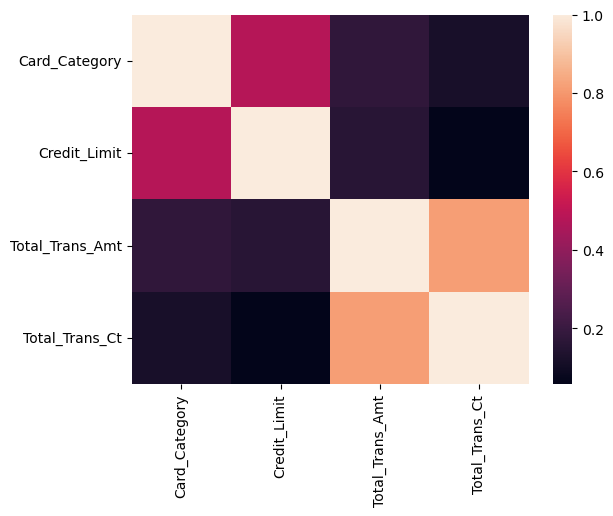

In [25]:
import seaborn as sns

sns.heatmap(df_Existing.corr())

### Feature Engineering

- We can create a new feature called the average Transaction amount.

In [26]:
df_Existing['Avg_Trans_Amt']=df_Existing['Total_Trans_Amt']/df_Existing['Total_Trans_Ct']

In [27]:
df_Existing.drop(['Total_Trans_Amt','Total_Trans_Ct'],axis=1,inplace=True)

In [28]:
df_Existing.corr()

,Card_Category,Credit_Limit,Avg_Trans_Amt
Card_Category,1.000000,0.480308,0.167064
Credit_Limit,0.480308,1.000000,0.163828
Avg_Trans_Amt,0.167064,0.163828,1.000000


In [29]:
df_Existing.head()

,Card_Category,Credit_Limit,Avg_Trans_Amt
0,0,12691.0,27.238095
1,0,8256.0,39.121212
2,0,3418.0,94.350000
3,0,3313.0,58.550000
4,0,4716.0,29.142857


<AxesSubplot: xlabel='Avg_Trans_Amt', ylabel='Credit_Limit'>

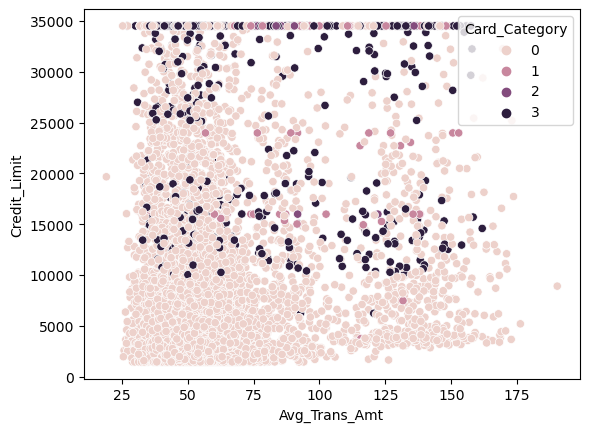

In [30]:
sns.scatterplot(x=df_Existing['Avg_Trans_Amt'],y=df_Existing['Credit_Limit'],hue=df_Existing['Card_Category'])

### Separating X and y

In [31]:
X=df_Existing.drop(['Card_Category'],axis=1)
y=df_Existing['Card_Category']

### Scaling the dependent variables

In [32]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()

X_scaled=std.fit_transform(X)

In [33]:
from sklearn.ensemble import RandomForestClassifier

model1=RandomForestClassifier()

model1.fit(X_scaled,y)

RandomForestClassifier()

### Building the Recommender

In [34]:
def Recommender(user_df):
    
    user_df_scaled=std.transform(user_df)
    
    y_pred=model1.predict(user_df_scaled)
    
    recommendation= le.inverse_transform(y_pred)
    recommendation=recommendation[0]
    
    print(y_pred)
    
    return recommendation

#### Testing the Recommender

In [36]:
#Creating a Test Data

test_df1=pd.DataFrame({'Credit_Limit': [35000],
                     'Avg_Trans_Amt':[150]})

In [37]:
test_df1

,Credit_Limit,Avg_Trans_Amt
0,35000,150


In [39]:
Recommender(test_df1)

[3]


'Silver'

In [40]:
#Creating a Test Data

test_df2=pd.DataFrame({'Credit_Limit': [3000],
                     'Avg_Trans_Amt':[100]})

In [41]:
test_df2

,Credit_Limit,Avg_Trans_Amt
0,3000,100


In [42]:
Recommender(test_df2)

[0]


'Blue'

###### We can see that our Credit card recommender is working fine.

## APPROACH-2 (Collaborative filtering)

In [43]:
df_Existing['Card_Category']=le.inverse_transform(df_Existing['Card_Category'])

In [44]:
#Creating user column

df_Existing['user'] = df_Existing.index

In [45]:
df_Existing.head()

,Card_Category,Credit_Limit,Avg_Trans_Amt,user
0,Blue,12691.0,27.238095,0
1,Blue,8256.0,39.121212,1
2,Blue,3418.0,94.350000,2
3,Blue,3313.0,58.550000,3
4,Blue,4716.0,29.142857,4


In [46]:
df_Existing.loc[1]['Card_Category']

'Blue'

###### Creating the Pivot table

In [47]:
pt = df_Existing.pivot_table(index='user',columns='Card_Category',values='Credit_Limit')

In [48]:
pt.fillna(0,inplace=True)

In [49]:
pt.head()

Card_Category,Blue,Gold,Platinum,Silver
user,,,,
0,12691.0,0.0,0.0,0.0
1,8256.0,0.0,0.0,0.0
2,3418.0,0.0,0.0,0.0
3,3313.0,0.0,0.0,0.0
4,4716.0,0.0,0.0,0.0


In [50]:
df_Existing_pivot_matrix = pt.values
users_ids = list(pt.index)

In [51]:
df_Existing_pivot_matrix

array([[12691.,     0.,     0.,     0.],
       [ 8256.,     0.,     0.,     0.],
       [ 3418.,     0.,     0.,     0.],
       ...,
       [13940.,     0.,     0.,     0.],
       [ 3688.,     0.,     0.,     0.],
       [ 4003.,     0.,     0.,     0.]])

###### Using Singular value decomposition method to handle sparsity

In [52]:
from scipy.sparse.linalg import svds

# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(df_Existing_pivot_matrix, k = 3)

In [53]:
sigma = np.diag(sigma)
sigma.shape

(3, 3)

In [55]:
# Re-Creating the matrix by multiplying the factorised matrices.

df_Existing_matrix = np.dot(np.dot(U, sigma), Vt) 
df_Existing_matrix

array([[ 1.26910000e+04,  4.10816416e-13, -3.54764318e-12,
        -4.92517307e-12],
       [ 8.25600000e+03, -1.59683394e-13, -2.30788292e-12,
        -1.55702829e-13],
       [ 3.41800000e+03, -6.61092348e-14, -9.55468001e-13,
        -1.32647085e-12],
       ...,
       [ 1.39400000e+04, -2.69620460e-13, -3.89678875e-12,
        -5.40988990e-12],
       [ 3.68800000e+03, -7.13314388e-14, -1.03094382e-12,
        -1.43125351e-12],
       [ 4.00300000e+03, -7.74240102e-14, -1.11899895e-12,
        -1.55349995e-12]])

In [56]:
df_Existing_final=pd.DataFrame(df_Existing_matrix,columns=pt.columns,index=users_ids)

In [57]:
df_Existing_final

Card_Category,Blue,Gold,Platinum,Silver
0,12691.0,4.108164e-13,-3.547643e-12,-4.925173e-12
1,8256.0,-1.596834e-13,-2.307883e-12,-1.557028e-13
2,3418.0,-6.610923e-14,-9.554680e-13,-1.326471e-12
3,3313.0,-6.407838e-14,-9.261163e-13,-1.285722e-12
4,4716.0,-9.121450e-14,-1.318311e-12,-1.830204e-12
...,...,...,...,...
10116,13187.0,-2.550563e-13,-3.686295e-12,-5.117663e-12
10117,17925.0,-3.466963e-13,-5.010756e-12,-6.956404e-12
10120,13940.0,-2.696205e-13,-3.896789e-12,-5.409890e-12
10121,3688.0,-7.133144e-14,-1.030944e-12,-1.431254e-12


#### Determing the similar user to recommend the credit card using cosine similarity.

In [58]:
from sklearn.metrics.pairwise import cosine_similarity


In [59]:
similarity_scores = cosine_similarity(df_Existing_final)

In [60]:
similarity_scores.shape

(8500, 8500)

In [61]:
similarity_scores[0]

array([1., 1., 1., ..., 1., 1., 1.])

In [64]:
def Recommender2(user):
    
    index = np.where(df_Existing_final.index==user)[0][0]
    similar_user = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:2]
    recommendation=df_Existing.loc[similar_user[0][0]]['Card_Category']
    
    return recommendation
    

In [65]:
Recommender2(9070)

'Blue'

In [66]:
Recommender2(10000)

'Blue'